<h1>QTM 151 Group 9 Final Project</h1>
<h5>Edward Cao, Chris Cheong, Ariel Levin, Bryan Wu</h5>

Research question: A comparison analysis between China and United States on various HRMI indicators such as food, health, and physical integrity

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

cpr_df = pd.read_csv('./csv files/cpr.csv')
hiy_df = pd.read_csv('./csv files/esr_hiy_incomeadjusted.csv')
lmy_df = pd.read_csv('./csv files/esr_lmy_incomeadjusted.csv')

# Filter rows where iso3c is 'CHN'
cpr_chn_df = cpr_df[cpr_df['iso3c'] == 'CHN']
physint_chn_mean_column = cpr_chn_df[['year','iso3c', 'physint_mean']]


hiy_chn_df = hiy_df[hiy_df['Country_Code'] == 'CHN']
hiy_chn_health_food_score = hiy_chn_df[['Year','Country_Code', 'HiY_Health_All_IAScore','HiY_Food_All_IAScore']]


lmy_chn_df = lmy_df[lmy_df['Country_Code'] == 'CHN']
lmy_chn_health_food_score = lmy_chn_df[['Year','Country_Code', 'LMY_Health_All_IAScore','LMY_Food_All_IAScore']]


cpr_usa_df = cpr_df[cpr_df['iso3c'] == 'USA']
physint_usa_mean_column = cpr_usa_df[['year','iso3c', 'physint_mean']]


hiy_usa_df = hiy_df[hiy_df['Country_Code'] == 'USA']
hiy_usa_health_food_score = hiy_usa_df[['Year','Country_Code', 'HiY_Health_All_IAScore','HiY_Food_All_IAScore']]


lmy_usa_df = lmy_df[lmy_df['Country_Code'] == 'USA']
lmy_usa_health_food_score = lmy_usa_df[['Year','Country_Code', 'LMY_Health_All_IAScore','LMY_Food_All_IAScore']]


#The only conistent data is for the years 2020-2021, Therefore we only want the data from those years:

#For China
physint_chn_mean_column_filtered = physint_chn_mean_column[physint_chn_mean_column['year'].isin([2020, 2021])]


missing_years = pd.DataFrame({
   'year': range(2000, 2020),  # Years 2000–2019
   'iso3c': ['CHN'] * 20,      # Country code for China
   'physint_mean': [np.nan] * 20  # NA for physint_mean
})

physint_chn_mean_column_filtered = pd.concat([missing_years, physint_chn_mean_column_filtered], ignore_index=True)
hiy_chn_health_food_score_filtered = hiy_chn_health_food_score[hiy_chn_health_food_score['Year'].between(2000, 2021)]
lmy_chn_health_food_score_filtered = lmy_chn_health_food_score[lmy_chn_health_food_score['Year'].between(2000, 2021)]

#For the US
physint_usa_mean_column_filtered = physint_usa_mean_column[physint_usa_mean_column['year'].isin([2020, 2021])]
missing_years_usa = pd.DataFrame({
   'year': range(2000, 2020),  # Years 2000–2019
   'iso3c': ['USA'] * 20,      # Country code for the USA
   'physint_mean': [np.nan] * 20  # NA for physint_mean
})
physint_usa_mean_column_filtered = pd.concat([missing_years_usa, physint_usa_mean_column_filtered], ignore_index=True)


hiy_usa_health_food_score_filtered = hiy_usa_health_food_score[hiy_usa_health_food_score['Year'].between(2000, 2021)]
lmy_usa_health_food_score_filtered = lmy_usa_health_food_score[lmy_usa_health_food_score['Year'].between(2000, 2021)]


# Merge the dataframes for China
merged_chn_df = physint_chn_mean_column_filtered.merge(
   hiy_chn_health_food_score_filtered,
   left_on=['year', 'iso3c'],
   right_on=['Year', 'Country_Code'],
   how='inner'
).merge(
   lmy_chn_health_food_score_filtered,
   left_on=['year', 'iso3c'],
   right_on=['Year', 'Country_Code'],
   how='inner'
)
merged_chn_df = merged_chn_df.drop(columns=['Year_x', 'Country_Code_x', 'Year_y', 'Country_Code_y'])


print(merged_chn_df)




# Merge the dataframes for US
merged_usa_df = physint_usa_mean_column_filtered.merge(
   hiy_usa_health_food_score_filtered,
   left_on=['year', 'iso3c'],
   right_on=['Year', 'Country_Code'],
   how='inner'
).merge(
   lmy_usa_health_food_score_filtered,
   left_on=['year', 'iso3c'],
   right_on=['Year', 'Country_Code'],
   how='inner'
)
merged_usa_df = merged_usa_df.drop(columns=['Year_x', 'Country_Code_x', 'Year_y', 'Country_Code_y'])

print(merged_usa_df)


    year iso3c  physint_mean  HiY_Health_All_IAScore  HiY_Food_All_IAScore  \
0   2000   CHN           NaN               98.294322                   NaN   
1   2001   CHN           NaN               98.469800                   NaN   
2   2002   CHN           NaN               98.463825                   NaN   
3   2003   CHN           NaN               98.281566                   NaN   
4   2004   CHN           NaN               97.865961                   NaN   
5   2005   CHN           NaN               97.247989                   NaN   
6   2006   CHN           NaN               96.723862                   NaN   
7   2007   CHN           NaN               95.868146                   NaN   
8   2008   CHN           NaN               95.340791                   NaN   
9   2009   CHN           NaN               95.193877                   NaN   
10  2010   CHN           NaN               94.753078                   NaN   
11  2011   CHN           NaN               94.473802            

<h4>Figure 1</h4>

A series of group bar graphs showing three different Right Types on the X axis, Average Scores on the Y axis, and the two countries China and the United States. China is shown to have a higher Food Score and Health Score on average. The United States has a higher Physical Integrity Score.

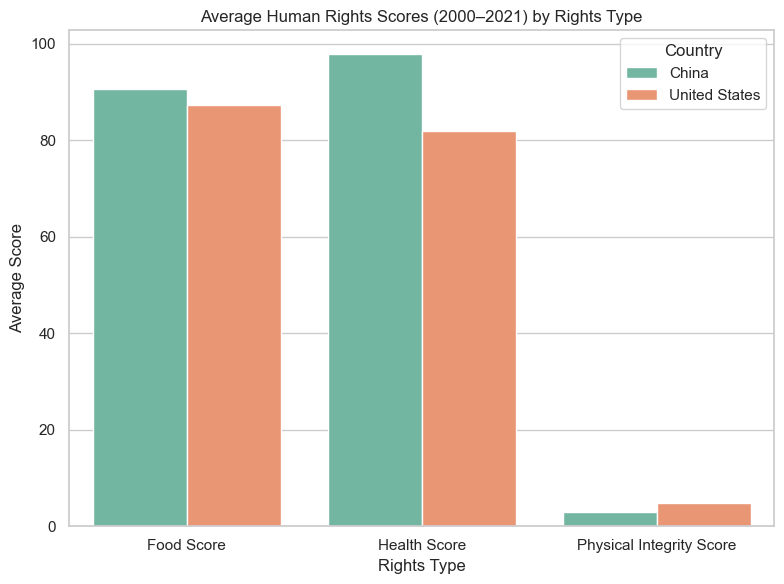

In [18]:
import seaborn as sns

# Prepare the data as before
merged_chn_df['Country'] = 'China'
merged_usa_df['Country'] = 'United States'

merged_chn_df['Health Score'] = merged_chn_df['LMY_Health_All_IAScore']
merged_chn_df['Food Score'] = merged_chn_df['LMY_Food_All_IAScore']
merged_chn_df['Physical Integrity Score'] = merged_chn_df['physint_mean']

merged_usa_df['Health Score'] = merged_usa_df['HiY_Health_All_IAScore']
merged_usa_df['Food Score'] = merged_usa_df['HiY_Food_All_IAScore']
merged_usa_df['Physical Integrity Score'] = merged_usa_df['physint_mean']

# Combine data
combined_df = pd.concat([merged_chn_df, merged_usa_df], ignore_index=True)

# Compute averages
summary_df = combined_df[['Country', 'Physical Integrity Score', 'Health Score', 'Food Score']]
averages = summary_df.groupby('Country').mean().reset_index()

# Melt for plotting: Rights Types on x-axis, Country as hue
melted_avg = pd.melt(averages,
                     id_vars='Country',
                     var_name='Rights Type',
                     value_name='Average Score')

# Reorder the Rights Type categories
rights_order = ['Food Score', 'Health Score', 'Physical Integrity Score']
melted_avg['Rights Type'] = pd.Categorical(melted_avg['Rights Type'], categories=rights_order, ordered=True)

# Plot with Rights Type on X-axis and Countries as bar colors
plt.figure(figsize=(8, 6))
sns.set(style='whitegrid')
sns.barplot(data=melted_avg, x='Rights Type', y='Average Score', hue='Country', palette='Set2')

# Titles and labels
plt.title('Average Human Rights Scores (2000–2021) by Rights Type')
plt.ylabel('Average Score')
plt.xlabel('Rights Type')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

<h4>Figure 2</h4>

A group of three line graphs, each being a Rights Type. The Blue line is China and the Orange line is the United States. Food Right Scores have been on the increase over the years in China, and the United States was increasing. The Health Rights Score was consistently level for both China and United States over the years, but China has been a higher score over United States all the years. For Physical Integrity Rights Score has only been recorded for two years, so the figure is limiting, but the United States outperformed China in the score slightly.

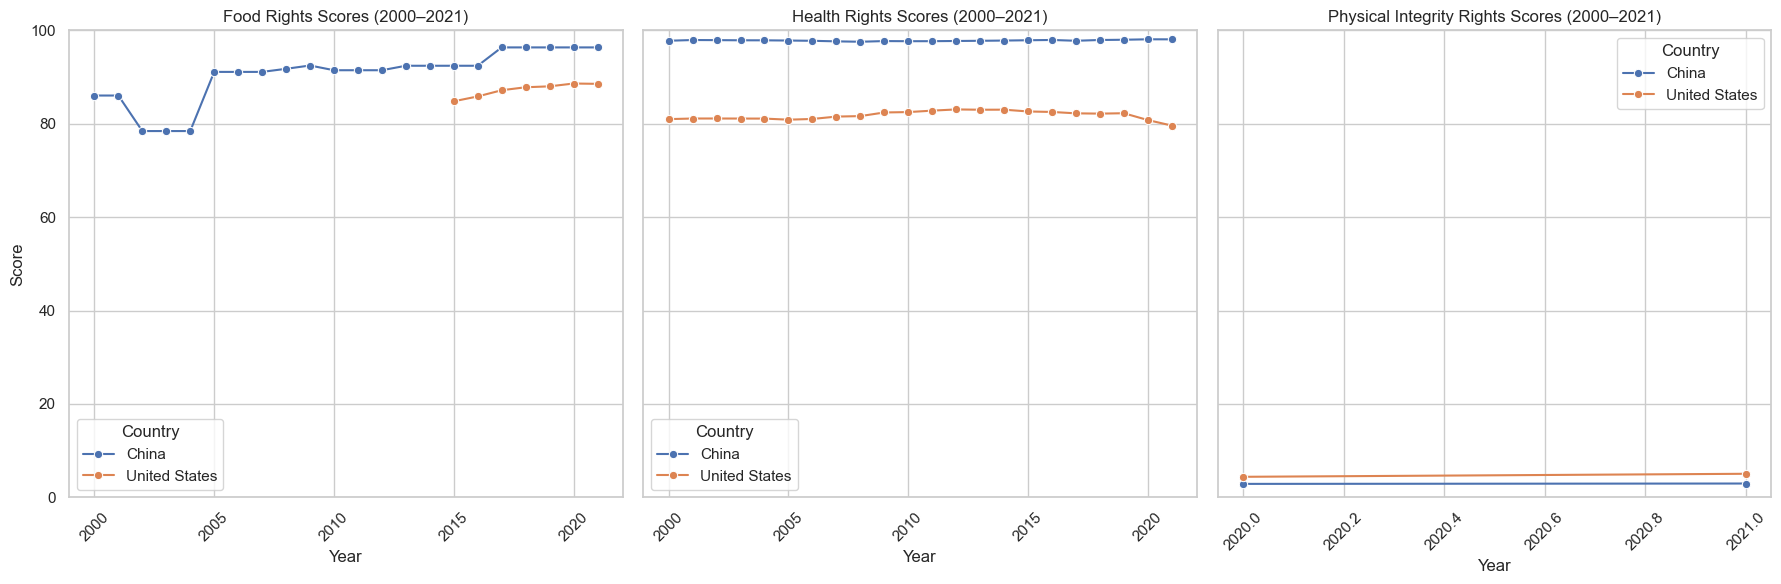

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Prepare data for Food Rights Scores
merged_chn_df['Country'] = 'China'
merged_usa_df['Country'] = 'United States'
merged_chn_df['Food Score'] = merged_chn_df['LMY_Food_All_IAScore']
merged_usa_df['Food Score'] = merged_usa_df['HiY_Food_All_IAScore']
chn_food = merged_chn_df[['year', 'Country', 'Food Score']]
usa_food = merged_usa_df[['year', 'Country', 'Food Score']]
food_df = pd.concat([chn_food, usa_food], ignore_index=True)

# Prepare data for Health Rights Scores
merged_chn_df['Health Score'] = merged_chn_df['LMY_Health_All_IAScore']
merged_usa_df['Health Score'] = merged_usa_df['HiY_Health_All_IAScore']
chn_health = merged_chn_df[['year', 'Country', 'Health Score']]
usa_health = merged_usa_df[['year', 'Country', 'Health Score']]
health_df = pd.concat([chn_health, usa_health], ignore_index=True)

# Prepare data for Physical Integrity Rights Scores
chn_physint = merged_chn_df[['year', 'Country', 'physint_mean']].rename(columns={'physint_mean': 'Integrity Score'})
usa_physint = merged_usa_df[['year', 'Country', 'physint_mean']].rename(columns={'physint_mean': 'Integrity Score'})
physint_df = pd.concat([chn_physint, usa_physint], ignore_index=True)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot Food Rights Scores
sns.lineplot(data=food_df, x='year', y='Food Score', hue='Country', marker='o', ax=axes[0])
axes[0].set_title('Food Rights Scores (2000–2021)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Score')
axes[0].set_ylim(0, 100)
axes[0].legend(title='Country')
axes[0].tick_params(axis='x', rotation=45)

# Plot Health Rights Scores
sns.lineplot(data=health_df, x='year', y='Health Score', hue='Country', marker='o', ax=axes[1])
axes[1].set_title('Health Rights Scores (2000–2021)')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('')
axes[1].set_ylim(0, 100)
axes[1].legend(title='Country')
axes[1].tick_params(axis='x', rotation=45)

# Plot Physical Integrity Rights Scores
sns.lineplot(data=physint_df, x='year', y='Integrity Score', hue='Country', marker='o', ax=axes[2])
axes[2].set_title('Physical Integrity Rights Scores (2000–2021)')
axes[2].set_xlabel('Year')
axes[2].set_ylabel('')
axes[2].set_ylim(0, 100)
axes[2].legend(title='Country')
axes[2].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()



<h4>Figure 3</h4>

We were curious about the relationship between food and health rights scores in China, so we plotted a scatter plot of the two scores. The trendline is a linear regression line that best fits the data points. The p-value indicates the significance of the relationship between the two variables. The p-value of 0.7656 was not statistically significant, indicating that there is no strong relationship between food and health rights scores in China. This suggests that improvements in one area do not necessarily lead to improvements in the other. The trendline shows a positive slope, indicating a slight positive correlation, but the p-value suggests that this correlation is not statistically significant.

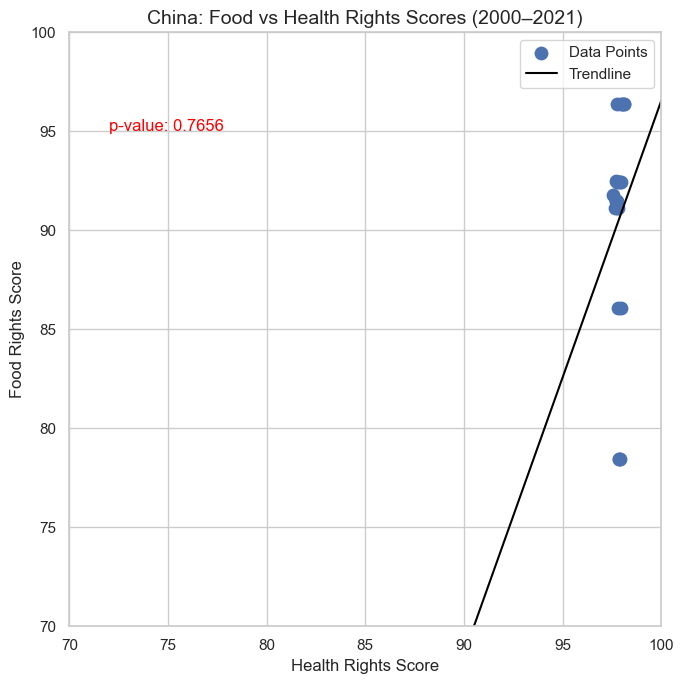

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t

# Extract and clean China's ESR scores
merged_chn_df['Health Score'] = merged_chn_df['LMY_Health_All_IAScore']
merged_chn_df['Food Score'] = merged_chn_df['LMY_Food_All_IAScore']
scatter_df = merged_chn_df[['Health Score', 'Food Score']].dropna()

# Calculate the coefficients for the trendline (y = mx + b)
x = scatter_df['Health Score'].values
y = scatter_df['Food Score'].values
m, b = np.polyfit(x, y, 1)  # Linear regression using numpy

# Calculate residuals and standard error
y_pred = m * x + b
residuals = y - y_pred
n = len(x)
std_err = np.sqrt(np.sum(residuals**2) / (n - 2)) / np.sqrt(np.sum((x - np.mean(x))**2))

# Calculate t-statistic and p-value
t_stat = m / std_err
p_value = 2 * (1 - t.cdf(abs(t_stat), df=n - 2))  # Two-tailed test

# Generate the trendline
x_range = np.linspace(70, 100, 500)  # Cover the entire x-axis range
y_trendline = m * x_range + b

# Set up plot
plt.figure(figsize=(7, 7))  # Square and proportional
sns.set(style='whitegrid')

# Scatter plot
plt.scatter(x, y, s=80, label='Data Points')

# Plot the trendline
plt.plot(x_range, y_trendline, color='black', linestyle='-', label='Trendline')

# Display the p-value on the graph
plt.text(72, 95, f'p-value: {p_value:.4f}', fontsize=12, color='red')

# Axis limits
plt.xlim(70, 100)
plt.ylim(70, 100)

# Titles and labels
plt.title('China: Food vs Health Rights Scores (2000–2021)', fontsize=14)
plt.xlabel('Health Rights Score')
plt.ylabel('Food Rights Score')
plt.legend()
plt.tight_layout()
plt.show()

<h4>Figure 4</h4>

This figure shows the average scores for Food Rights, Health Rights, and Physical Integrity Rights for both China and the United States from 2000 to 2021. The dashed lines connect the scores for each rights type between the two countries, allowing for a clear visual comparison of their respective standings in these areas. The largest gap is observed in the Health Rights, where the China scores significantly higher than the United States. The Food Rights and Physical Integrity Rights scores are closer, but the Food Rights has China in the lead and Physical Integrity Rights has United States in the lead.

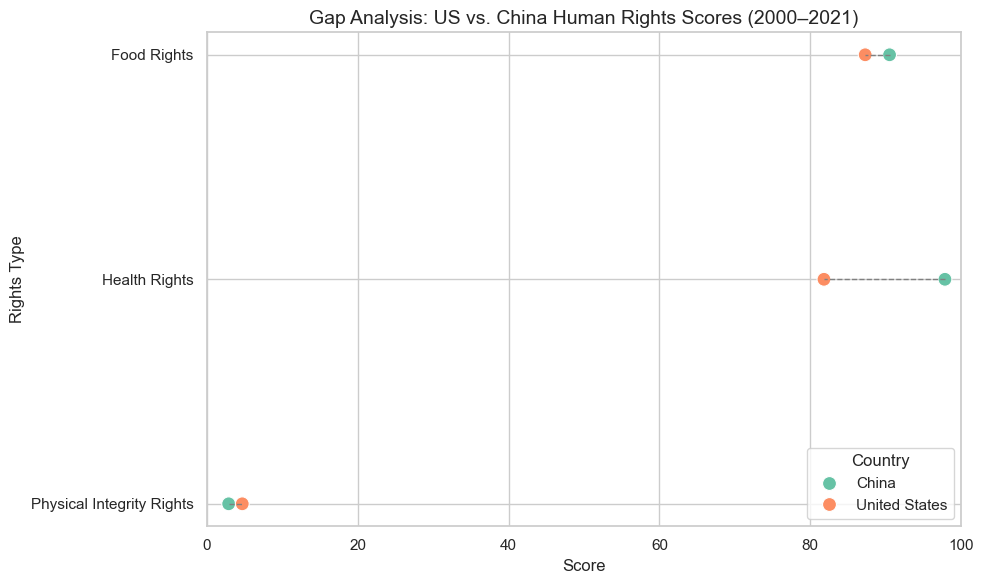

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for the Dumbbell Plot
dumbbell_data = pd.DataFrame({
    'Rights Type': ['Food Rights', 'Health Rights', 'Physical Integrity Rights'],
    'China': [
        merged_chn_df['LMY_Food_All_IAScore'].mean(),
        merged_chn_df['LMY_Health_All_IAScore'].mean(),
        merged_chn_df['physint_mean'].mean()
    ],
    'United States': [
        merged_usa_df['HiY_Food_All_IAScore'].mean(),
        merged_usa_df['HiY_Health_All_IAScore'].mean(),
        merged_usa_df['physint_mean'].mean()
    ]
})

# Melt the data for plotting
dumbbell_melted = dumbbell_data.melt(id_vars='Rights Type', var_name='Country', value_name='Score')

# Plot the Dumbbell Plot
plt.figure(figsize=(10, 6))
sns.set(style='whitegrid')

# Draw lines connecting the points for each Rights Type
for _, row in dumbbell_data.iterrows():
    plt.plot(
        [row['China'], row['United States']],
        [row['Rights Type'], row['Rights Type']],
        color='gray', linestyle='--', linewidth=1
    )

# Add points for each country
sns.scatterplot(data=dumbbell_melted, x='Score', y='Rights Type', hue='Country', s=100, palette='Set2')

# Titles and labels
plt.title('Gap Analysis: US vs. China Human Rights Scores (2000–2021)', fontsize=14)
plt.xlabel('Score')
plt.ylabel('Rights Type')
plt.xlim(0, 100)
plt.legend(title='Country', loc='lower right')
plt.tight_layout()
plt.show()


<h4>Conclusion</h4>

The Human Rights Measurement Initiative (HRMI) indicators highlight significant differences between China and the United States in food, health, and physical integrity rights. China consistently scores higher in Food and Health Rights, with steady improvements over time, while the United States leads in Physical Integrity Rights. The analysis reveals that while there is a slight positive correlation between Food and Health Rights in China, the relationship is not statistically significant, suggesting independent progress in these areas. The comparison underscores the importance of HRMI indicators in identifying disparities and guiding targeted efforts to improve human rights outcomes globally.